### Table of Contents

* [Goals](#goals)
* [Data](#Data)
    * [Loading the Data](#section1_1)
    * [Data Information](#section1_2)
* [Data Cleaning](#cleaning)
    * [Renaming Columns for Consistency](#section2_1)
    * [Cleaning the Income Column](#section2_2)
* [Exploratory Data Analysis](#EDA)
    * [Big Picture](#section3_1)
    * [Results for Existing Marketing Campaigns](#section3_2)
    * [Geographical Data](#section3_3)
    * [Customer Marital Status](#section3_4)
    * [Customer Complaints](#section3_5)
* [Conclusion](#conclusion)


### Goals <a class="anchor" id="Goals"></a>

This notebook contains an analysis on some marketing data. The goal for this project was to do the following:
* Get acquainted with the data
* Clean the data so it is ready for analysis
* Develop some questions for analysis
* Analyze variables within the data to gain patterns and insights on these questions

### Data <a class="anchor" id="Data"></a>

The data for this project was downloaded from Kaggle:

[https://www.kaggle.com/jackdaoud/marketing-data](https://www.kaggle.com/jackdaoud/marketing-data)

Information regarding the features for the data are located in the `Column` section on the website.

Some code inspiration for this analysis was sourced from [this noteboook](https://www.kaggle.com/dimitriirfan/market-eda).

#### Loading the Data <a class="anchor" id="section1_1"></a>
First, the necessary libraries are loaded into the notebook. The pandas library is used to import data from marketing_data.csv and preview the first five rows of the DataFrame.

In [1]:
# sets up matplotlib with interactive features
%matplotlib notebook
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
marketing_data = pd.read_csv("marketing_data.csv")
# see all columns

pd.set_option('display.max_columns', None)
marketing_data.head()

,id,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [3]:
marketing_data.columns

Index(['id', 'YearBirth', 'Education', 'MaritalStatus', 'Income', 'Kidhome',
       'Teenhome', 'DtCustomer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProducts', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [4]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2240 non-null   int64 
 1   YearBirth            2240 non-null   int64 
 2   Education            2240 non-null   object
 3   MaritalStatus        2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   DtCustomer           2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProducts      2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [5]:
# see what columns have missing data
marketing_data.isnull().sum()

id                      0
YearBirth               0
Education               0
MaritalStatus           0
Income                 24
Kidhome                 0
Teenhome                0
DtCustomer              0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProducts         0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

#### Data Information <a class="anchor" id="section1_2"></a>

Some immediate insights are:
* There are 28 columns and 2240 rows.
* The name and datatype of each column -- most values are integers in this dataset.
* The ` income` column has missing data, values that are not integers or floats, and an extra space in the column name, so some cleaning will be necessary for this column prior to conducting EDA. 
* The column names could be renamed for more consistency.
* Some basic summary statistics on each of numerical variables.

In [6]:
print(marketing_data.describe())

                 id    YearBirth      Kidhome     Teenhome      Recency  \
count   2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804     0.444196     0.506250    49.109375   
std     3246.662198    11.984069     0.538398     0.544538    28.962453   
min        0.000000  1893.000000     0.000000     0.000000     0.000000   
25%     2828.250000  1959.000000     0.000000     0.000000    24.000000   
50%     5458.500000  1970.000000     0.000000     0.000000    49.000000   
75%     8427.750000  1977.000000     1.000000     1.000000    74.000000   
max    11191.000000  1996.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000         0.000000

In [11]:
# Clean Columns

#taking dollar sign out of values and convert to float
#marketing_data['Income'] = marketing_data['Income'].replace('[\$,]', '', regex=True).astype(float)

# summary stats
#marketing_data['Income'].describe()

# put all columns into snake case format
#marketing_data.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', x).lower() for x in marketing_data.columns]

print(marketing_data['income'].head())

0    84835.0
1    57091.0
2    67267.0
3    32474.0
4    21474.0
Name: income, dtype: float64


In [12]:
import warnings
warnings.filterwarnings('ignore')

<IPython.core.display.Javascript object>


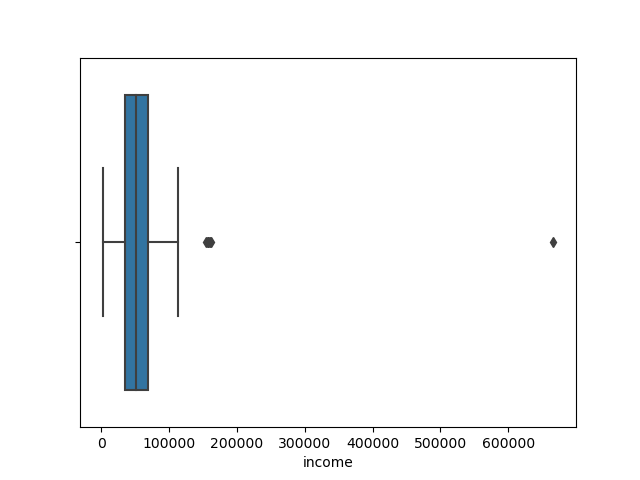

In [13]:
plt.figure()
sns.boxplot(marketing_data["income"])
plt.show()


#### Data Cleaning <a class="anchor" id="cleaning"></a>

As mentioned before, the `Income` column could use some cleaning. The column names overall could also be renamed for more consistency. To do this, the following is done:
* Put all columns in [snake case format](https://www.ssc.wisc.edu/sscc/pubs/DWE/book/4-2-naming-variables.html) using regex and list comprehension
* Change `Income` values to floats
* Set the values as floats

The `Income` distribution is then looked at using boxplots. Since there is one large outlier, it is removed from the `marketing_data`. Next, the missing values are replaced with the mean income using the `.mean()` method.

`Income` is one of the main variables that will be explored in the analysis, so it is essential that it is tidy and ready for exploration.

<IPython.core.display.Javascript object>


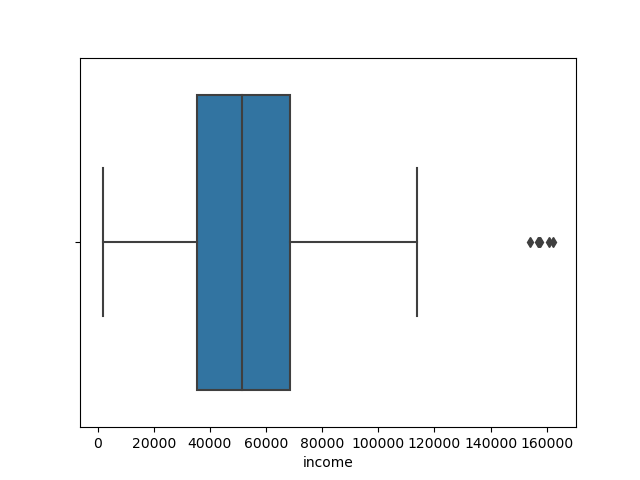

count      2215.000000
mean      51969.861400
std       21526.320095
min        1730.000000
25%       35284.000000
50%       51373.000000
75%       68487.000000
max      162397.000000
Name: income, dtype: float64

In [14]:
# remove incomes below 300000
marketing_data = marketing_data[marketing_data['income']<300000]

plt.figure()
sns.boxplot(marketing_data["income"])
plt.show()


marketing_data['income'].describe()

After removing the outlier, the distribution is more symmetric. There are still some outliers; however, with not major skewness or huge outliers remaining, the `income` variable is ready for analysis.

In [15]:
# replace missing values with the mean income
marketing_data['income'] = marketing_data['income'].fillna(marketing_data['income'].mean())

### Exploratory Data Analysis <a class="anchor" id="EDA"></a>

After some data cleaning and tidying, the DataFrame is ready for EDA. The following independent variables will be focused on in the analysis:
* `martial_status`
* `country`
* `income`

The binary variable:
* `accepted_cmp1`

The goal will be to see how these independent variables associate with the following dependent variables:
* `mnt_wines`
* `mnt_fruits`
* `mnt_meat_products`
* `mnt_fish_products`
* `mnt_sweet_products`  
* `mnt_gold_products` 
* `complain`


The hope is that through summary statistics and visualizations the following question can be answered:
* The results from existing marketing campaings. 
* The customers' behavior based on their location
* Does marital status influences customer behavior?
* Can customer complaints provide insights into areas of improvement?

Along the way, this question may be refined and more questions may pop up.

#### Big Picture <a class="anchor" id="section3_1">

In order to observe the dataset as a whole, `DataFrame.hist()` is used.. It gives a full view of all numerical variables in the distribution. Most of the amount bought and number purchased variables are skewed right and have similar distributions.

Next, correlations between all numerical variables are viewed using a heat matrix. The heat matrix shows that `income` has the strongest association with numerous variables. Interestingly, it showed that `age` may not be a huge factor overall. This is something to look into it a bit more in the analysis.

<IPython.core.display.Javascript object>


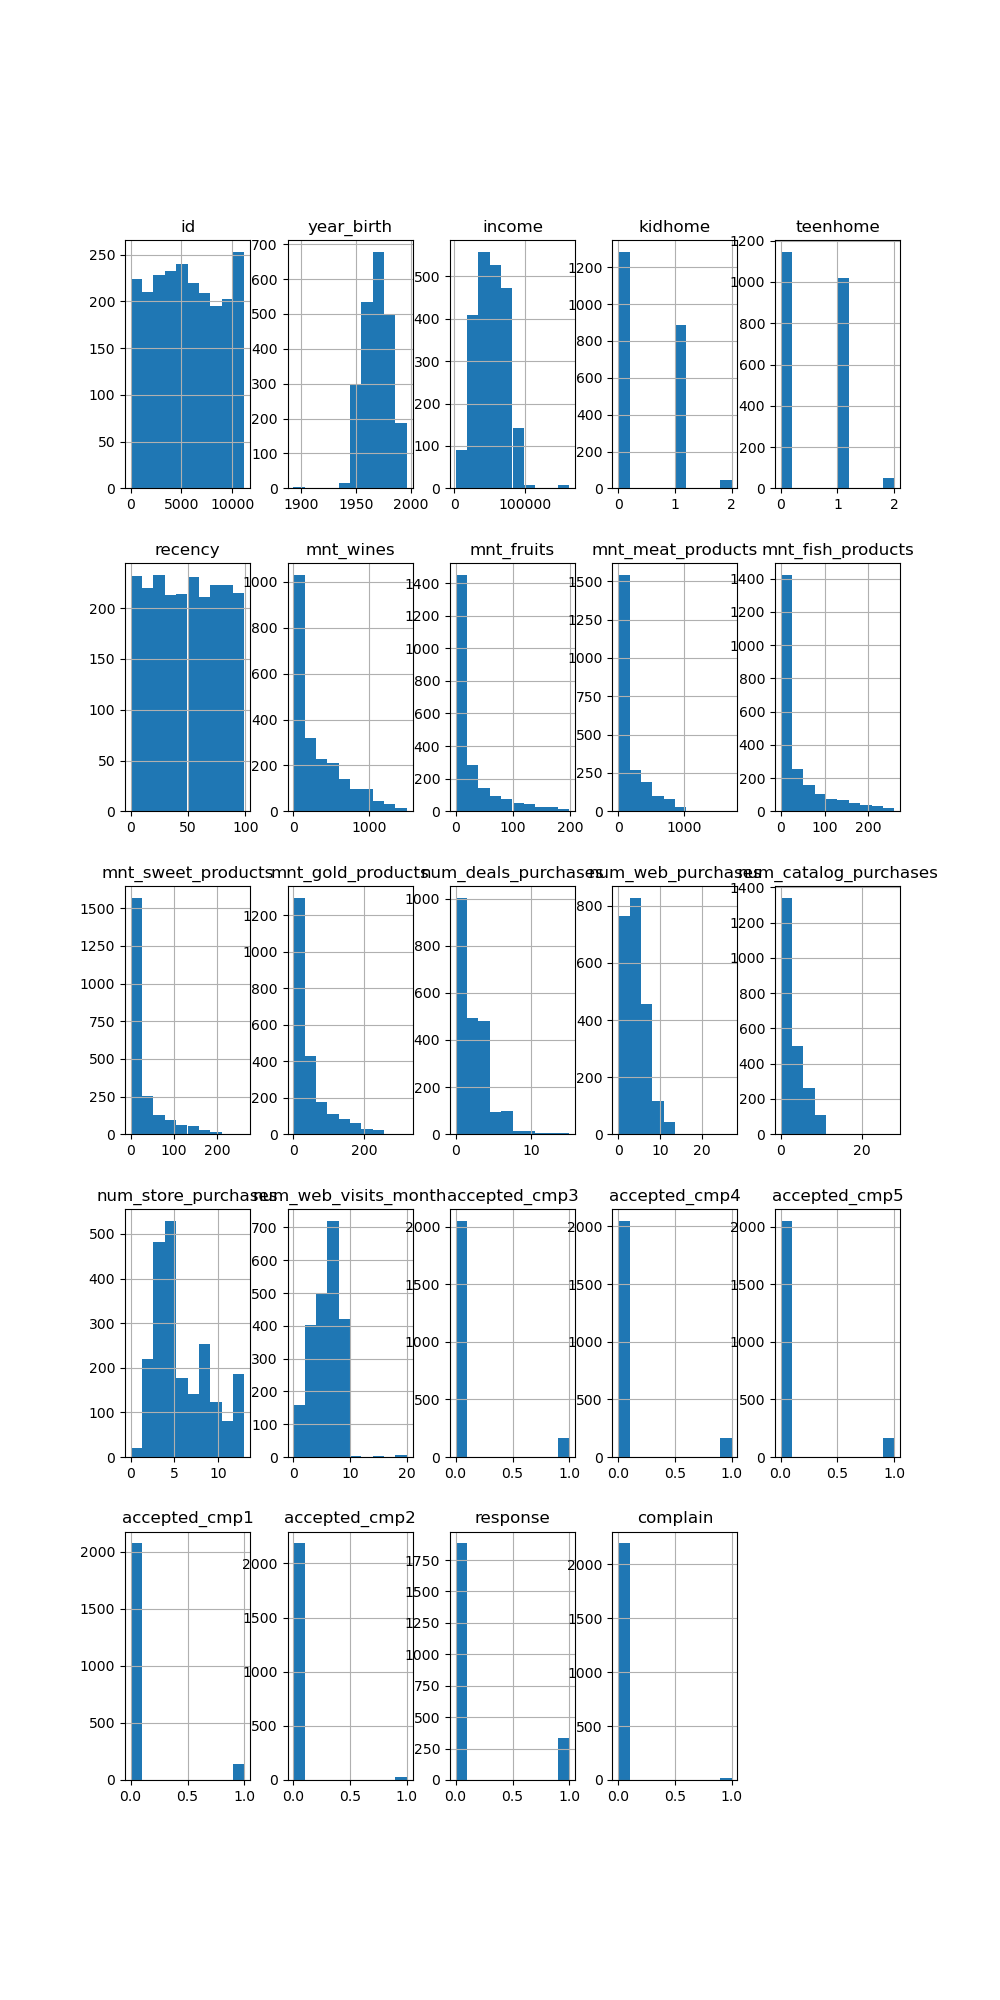

In [16]:
fig = plt.figure(figsize = (10,20))
ax = fig.gca()
marketing_data.hist(ax = ax);

This overview shows that the purchase behavior columns are all skewed to the right.

In [17]:
marketing_data.corr()

,id,year_birth,income,kidhome,teenhome,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_products,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,accepted_cmp3,accepted_cmp4,accepted_cmp5,accepted_cmp1,accepted_cmp2,response,complain
id,1.000000,0.001991,0.000064,0.001181,-0.002535,-0.043918,-0.020625,0.007495,-0.005550,-0.023712,-0.005600,-0.010847,-0.041097,-0.018271,-0.001970,-0.012615,-0.007946,-0.035751,-0.023790,-0.006917,-0.018085,-0.014936,-0.021273,0.034217
year_birth,0.001991,1.000000,-0.198064,0.233376,-0.350609,-0.016023,-0.159225,-0.017653,-0.033499,-0.040265,-0.020013,-0.064030,-0.058953,-0.152951,-0.121610,-0.127660,0.123833,0.061878,-0.066030,0.010663,-0.009531,-0.006682,0.023825,-0.030380
income,0.000064,-0.198064,1.000000,-0.514935,0.034363,0.006945,0.688269,0.507959,0.692465,0.520351,0.523746,0.389204,-0.108457,0.458812,0.696541,0.630397,-0.650564,-0.015286,0.219337,0.396571,0.327167,0.103909,0.161049,-0.030583
kidhome,0.001181,0.233376,-0.514935,1.000000,-0.039450,0.011919,-0.497132,-0.373350,-0.439100,-0.388751,-0.377855,-0.354857,0.216594,-0.371895,-0.504393,-0.501151,0.447462,0.016203,-0.161936,-0.205227,-0.174085,-0.081833,-0.077733,0.041034
teenhome,-0.002535,-0.350609,0.034363,-0.039450,1.000000,0.013466,0.003380,-0.176726,-0.261478,-0.205523,-0.163368,-0.020152,0.386754,0.161948,-0.112962,0.049393,0.131386,-0.042649,0.038265,-0.190950,-0.144996,-0.015573,-0.154114,0.003267
recency,-0.043918,-0.016023,0.006945,0.011919,0.013466,1.000000,0.015370,-0.005971,0.022254,0.000331,0.024859,0.017417,0.002470,-0.005803,0.023856,-0.000784,-0.018453,-0.032378,0.017455,-0.000596,-0.021172,-0.001448,-0.199981,0.013599
mnt_wines,-0.020625,-0.159225,0.688269,-0.497132,0.003380,0.015370,1.000000,0.386977,0.568752,0.397602,0.390178,0.392588,0.009235,0.553745,0.634684,0.639889,-0.321928,0.061363,0.373103,0.473530,0.351380,0.206175,0.246185,-0.039516
mnt_fruits,0.007495,-0.017653,0.507959,-0.373350,-0.176726,-0.005971,0.386977,1.000000,0.547796,0.593407,0.571581,0.396443,-0.134416,0.302001,0.486229,0.458457,-0.418706,0.014385,0.006356,0.212840,0.191786,-0.009997,0.122391,-0.005338
mnt_meat_products,-0.005550,-0.033499,0.692465,-0.439100,-0.261478,0.022254,0.568752,0.547796,1.000000,0.573507,0.535048,0.359328,-0.121079,0.307013,0.734082,0.485877,-0.539464,0.018356,0.091544,0.376827,0.313034,0.043491,0.237653,-0.023814
mnt_fish_products,-0.023712,-0.040265,0.520351,-0.388751,-0.205523,0.000331,0.397602,0.593407,0.573507,1.000000,0.583804,0.427056,-0.143062,0.299621,0.532692,0.457641,-0.446392,-0.000288,0.016038,0.196225,0.261566,0.002316,0.108054,-0.021246


<IPython.core.display.Javascript object>


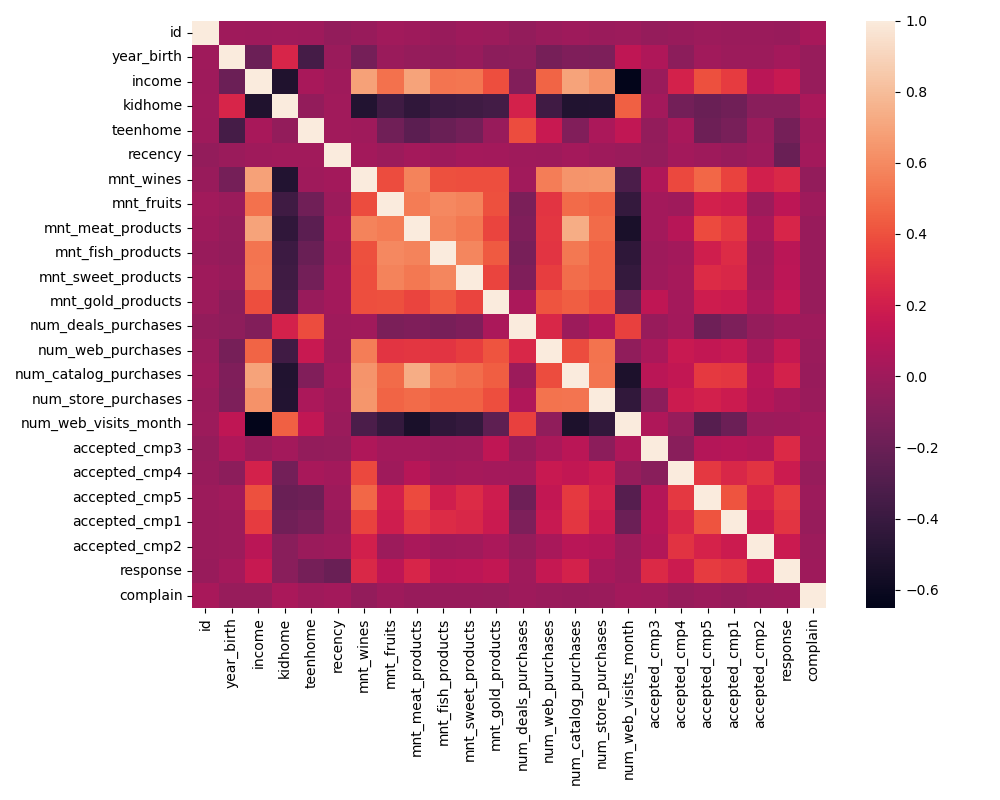

In [18]:
plt.figure(figsize=(10,8))
# heat matrix that shows correlation across all numerical variables
sns.heatmap(data=marketing_data.corr(),annot=False)
plt.tight_layout()
plt.show()

The table of correlations does not offer much help as there are too many numbers to read through

#### Results for Existing Marketing Campaigns
(Focusing on Wine Purchasing Behavior)

Now it's time to start looking into the big question. To analyze the results from existing marketing campaigns, we can look at how different marketing efforts (e.g., wine campaigns, social media promotions, discounts, etc.) have impacted customer behavior. For example, we can compare the purchasing behavior of customers who received a specific marketing campaign against those who did not. On this visualization, we focused only for marketing campaigns affecting wine purchasing behavior.

<IPython.core.display.Javascript object>


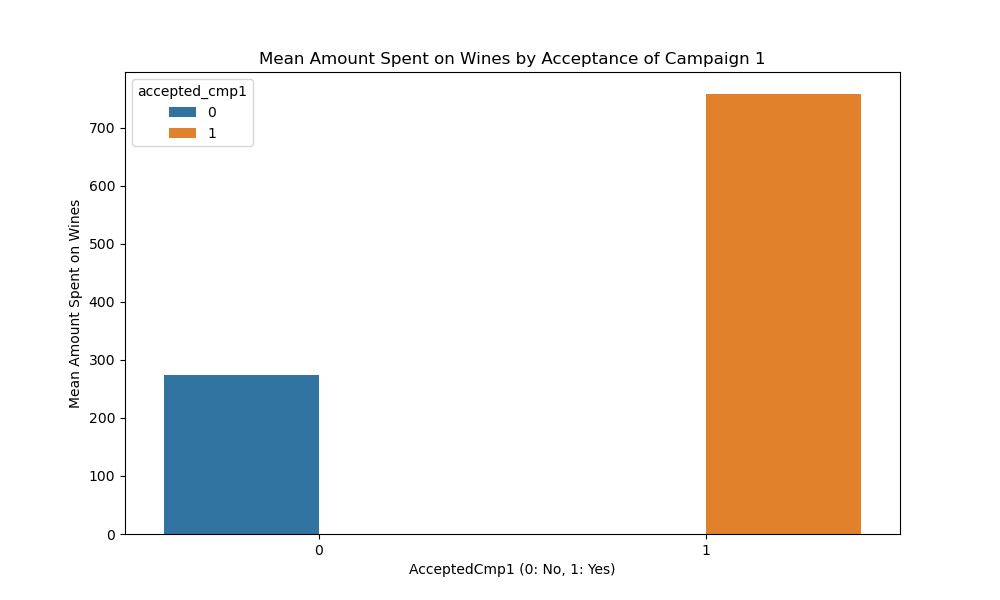

Response Rate for Campaign 1: 0.5563380281690141


In [19]:
# Grouping the data by 'AcceptedCmp1' and calculating the mean amount spent on different product categories
cmp1_grouped = marketing_data.groupby('accepted_cmp1')[['mnt_wines', 'mnt_fruits', 'mnt_meat_products', 'mnt_fish_products']].mean()

# Resetting the index to convert 'AcceptedCmp1' from the index to a regular column
cmp1_grouped.reset_index(inplace=True)

# Visualizing the mean amount spent on different product categories for customers who accepted and did not accept the campaign
plt.figure(figsize=(10, 6))
sns.barplot(data=cmp1_grouped, x='accepted_cmp1', y='mnt_wines', hue='accepted_cmp1')
plt.title("Mean Amount Spent on Wines by Acceptance of Campaign 1")
plt.xlabel("AcceptedCmp1 (0: No, 1: Yes)")
plt.ylabel("Mean Amount Spent on Wines")
plt.show()

# Similarly, you can visualize the mean amount spent on other product categories (e.g., fruits, meat, fish) for Campaign 1.

# Analyzing the response rate for Campaign 1
response_rate_cmp1 = marketing_data['response'][marketing_data['accepted_cmp1'] == 1].mean()

print("Response Rate for Campaign 1:", response_rate_cmp1)




<IPython.core.display.Javascript object>


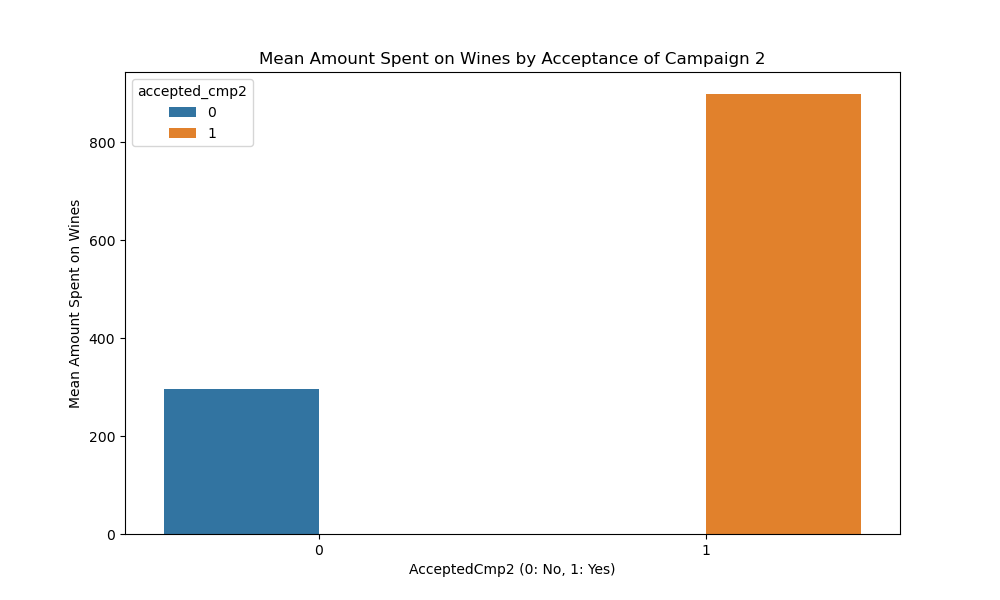

Response Rate for Campaign 2: 0.6666666666666666


In [20]:
# Grouping the data by 'AcceptedCmp2' and calculating the mean amount spent on different product categories
cmp2_grouped = marketing_data.groupby('accepted_cmp2')[['mnt_wines', 'mnt_fruits', 'mnt_meat_products', 'mnt_fish_products']].mean()

# Resetting the index to convert 'AcceptedCmp2' from the index to a regular column
cmp2_grouped.reset_index(inplace=True)

# Visualizing the mean amount spent on different product categories for customers who accepted and did not accept the campaign
plt.figure(figsize=(10, 6))
sns.barplot(data=cmp2_grouped, x='accepted_cmp2', y='mnt_wines', hue='accepted_cmp2')
plt.title("Mean Amount Spent on Wines by Acceptance of Campaign 2")
plt.xlabel("AcceptedCmp2 (0: No, 1: Yes)")
plt.ylabel("Mean Amount Spent on Wines")
plt.show()

# Similarly, you can visualize the mean amount spent on other product categories (e.g., fruits, meat, fish) for Campaign 2.

# Analyzing the response rate for Campaign 2
response_rate_cmp2 = marketing_data['response'][marketing_data['accepted_cmp2'] == 1].mean()

print("Response Rate for Campaign 2:", response_rate_cmp2)




<IPython.core.display.Javascript object>


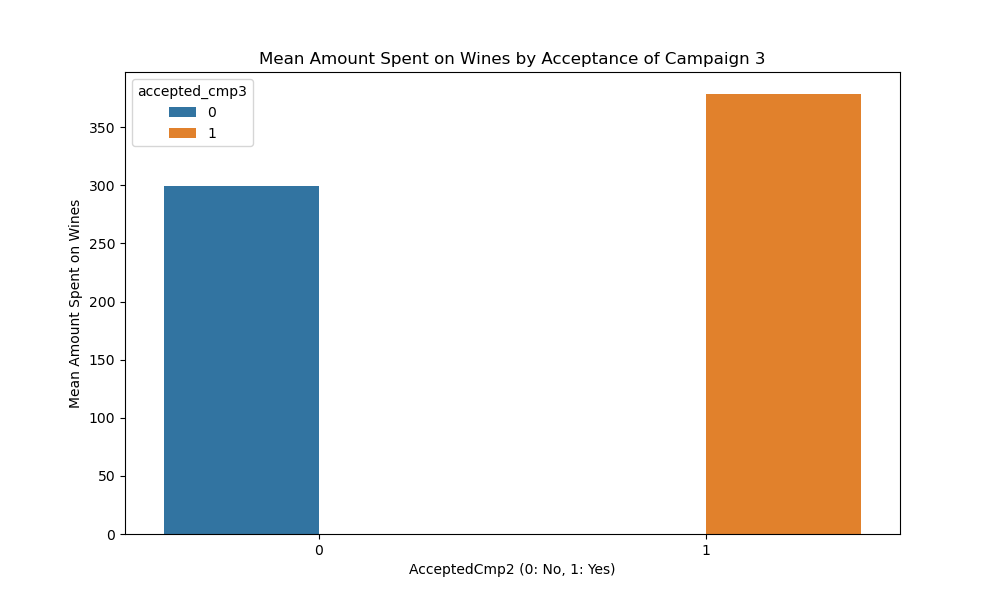

Response Rate for Campaign 3: 0.4723926380368098


In [21]:
# Grouping the data by 'AcceptedCmp3' and calculating the mean amount spent on different product categories
cmp3_grouped = marketing_data.groupby('accepted_cmp3')[['mnt_wines', 'mnt_fruits', 'mnt_meat_products', 'mnt_fish_products']].mean()

# Resetting the index to convert 'AcceptedCmp2' from the index to a regular column
cmp3_grouped.reset_index(inplace=True)

# Visualizing the mean amount spent on different product categories for customers who accepted and did not accept the campaign
plt.figure(figsize=(10, 6))
sns.barplot(data=cmp3_grouped, x='accepted_cmp3', y='mnt_wines', hue='accepted_cmp3')
plt.title("Mean Amount Spent on Wines by Acceptance of Campaign 3")
plt.xlabel("AcceptedCmp2 (0: No, 1: Yes)")
plt.ylabel("Mean Amount Spent on Wines")
plt.show()

# Similarly, you can visualize the mean amount spent on other product categories (e.g., fruits, meat, fish) for Campaign 3.

# Analyzing the response rate for Campaign 3
response_rate_cmp3 = marketing_data['response'][marketing_data['accepted_cmp3'] == 1].mean()

print("Response Rate for Campaign 3:", response_rate_cmp3)


<IPython.core.display.Javascript object>


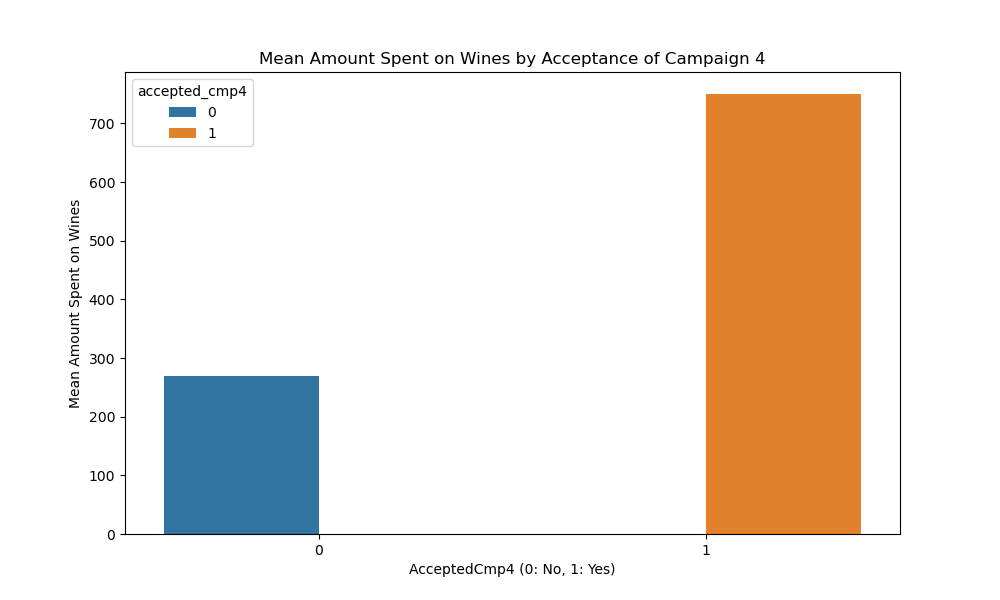

Response Rate for Campaign 4: 0.3780487804878049


In [22]:
# Grouping the data by 'AcceptedCmp4' and calculating the mean amount spent on different product categories
cmp4_grouped = marketing_data.groupby('accepted_cmp4')[['mnt_wines', 'mnt_fruits', 'mnt_meat_products', 'mnt_fish_products']].mean()

# Resetting the index to convert 'AcceptedCmp4' from the index to a regular column
cmp4_grouped.reset_index(inplace=True)

# Visualizing the mean amount spent on different product categories for customers who accepted and did not accept the campaign
plt.figure(figsize=(10, 6))
sns.barplot(data=cmp4_grouped, x='accepted_cmp4', y='mnt_wines', hue='accepted_cmp4')
plt.title("Mean Amount Spent on Wines by Acceptance of Campaign 4")
plt.xlabel("AcceptedCmp4 (0: No, 1: Yes)")
plt.ylabel("Mean Amount Spent on Wines")
plt.show()

# Similarly, you can visualize the mean amount spent on other product categories (e.g., fruits, meat, fish) for Campaign 4.

# Analyzing the response rate for Campaign 4
response_rate_cmp4 = marketing_data['response'][marketing_data['accepted_cmp4'] == 1].mean()

print("Response Rate for Campaign 4:", response_rate_cmp4)


<IPython.core.display.Javascript object>


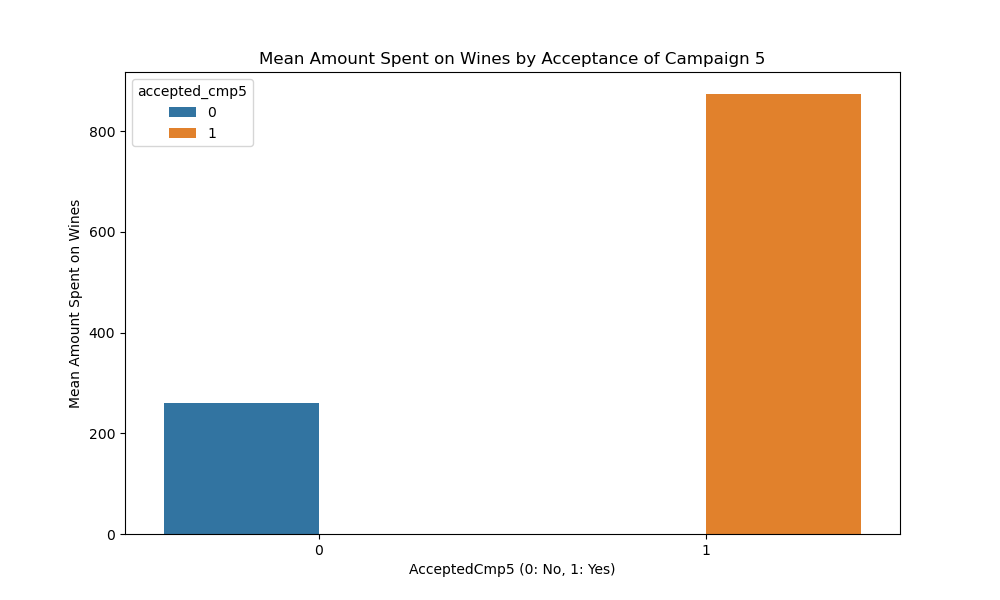

Response Rate for Campaign 5: 0.5617283950617284


In [23]:
# Grouping the data by 'AcceptedCmp5' and calculating the mean amount spent on different product categories
cmp5_grouped = marketing_data.groupby('accepted_cmp5')[['mnt_wines', 'mnt_fruits', 'mnt_meat_products', 'mnt_fish_products']].mean()

# Resetting the index to convert 'AcceptedCmp5' from the index to a regular column
cmp5_grouped.reset_index(inplace=True)

# Visualizing the mean amount spent on different product categories for customers who accepted and did not accept the campaign
plt.figure(figsize=(10, 6))
sns.barplot(data=cmp5_grouped, x='accepted_cmp5', y='mnt_wines', hue='accepted_cmp5')
plt.title("Mean Amount Spent on Wines by Acceptance of Campaign 5")
plt.xlabel("AcceptedCmp5 (0: No, 1: Yes)")
plt.ylabel("Mean Amount Spent on Wines")
plt.show()

# Similarly, you can visualize the mean amount spent on other product categories (e.g., fruits, meat, fish) for Campaign 5.

# Analyzing the response rate for Campaign 5
response_rate_cmp5 = marketing_data['response'][marketing_data['accepted_cmp5'] == 1].mean()

print("Response Rate for Campaign 5:", response_rate_cmp5)


Based on the conducted visualizations, customers who received marketing campaigns for wine were most likely to spend money
on wines compared to those who did not received marketing campaigns. 
We can fairly say that the existing marketing campaign for wine is effective.

#### Geographical Data

For this analysis, we'll assume that the "income" column represents the income level of customers and the "country" column represents their geographic region.

Please note that for geographical analysis, we need additional information like latitude and longitude coordinates of the regions, which are not present in the dataset. However, we can still proceed with a basic analysis using the coutnry for visualization purposes.

<IPython.core.display.Javascript object>


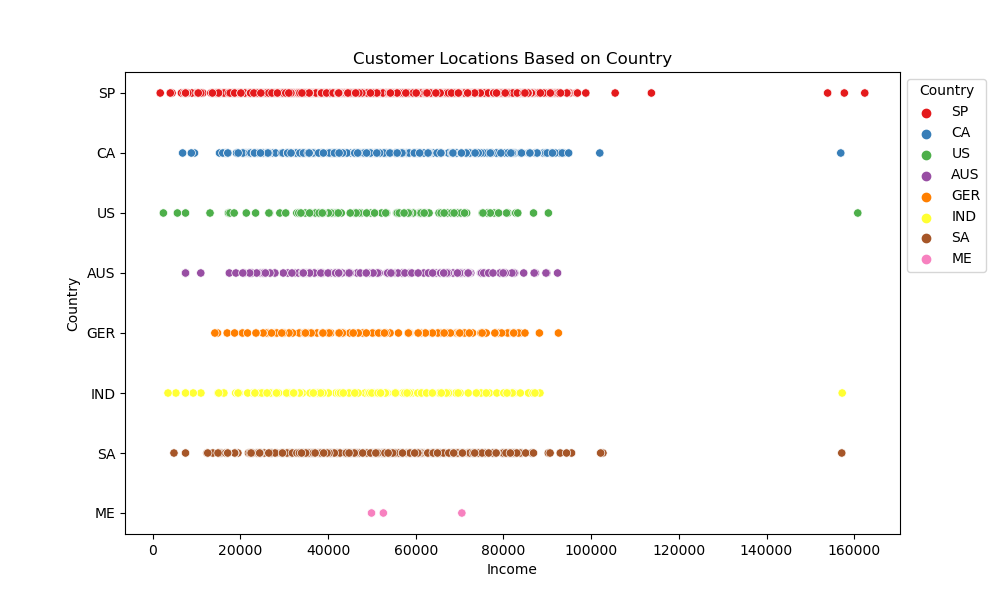

In [24]:
# Assuming "country" column represents the geographic regions, and "income" represents income levels.

# Plotting customer locations based on country
plt.figure(figsize=(10, 6))
sns.scatterplot(data=marketing_data, x='income', y='country', hue='country', palette='Set1')
plt.title("Customer Locations Based on Country")
plt.xlabel("Income")
plt.ylabel("Country")
plt.legend(title='Country', bbox_to_anchor=(1, 1))
plt.show()

From the scatterplot, we can observe clusters of points at various positions along the x-axis (income). Some clusters might be located towards the right side of the plot, indicating countries with higher average income levels such as SP, CA, US, IND, and SA. These countries are likely to have customers with higher purchasing power.

Outliers on the right side of the plot (farther to the right) may represent customers with exceptionally high incomes. These high-income customers might be of particular interest for marketing strategies that target premium or high-end products.

#### Customer Marital Status

Exploring how marital status influences customer bahavior focusing on single and married customers.

<IPython.core.display.Javascript object>


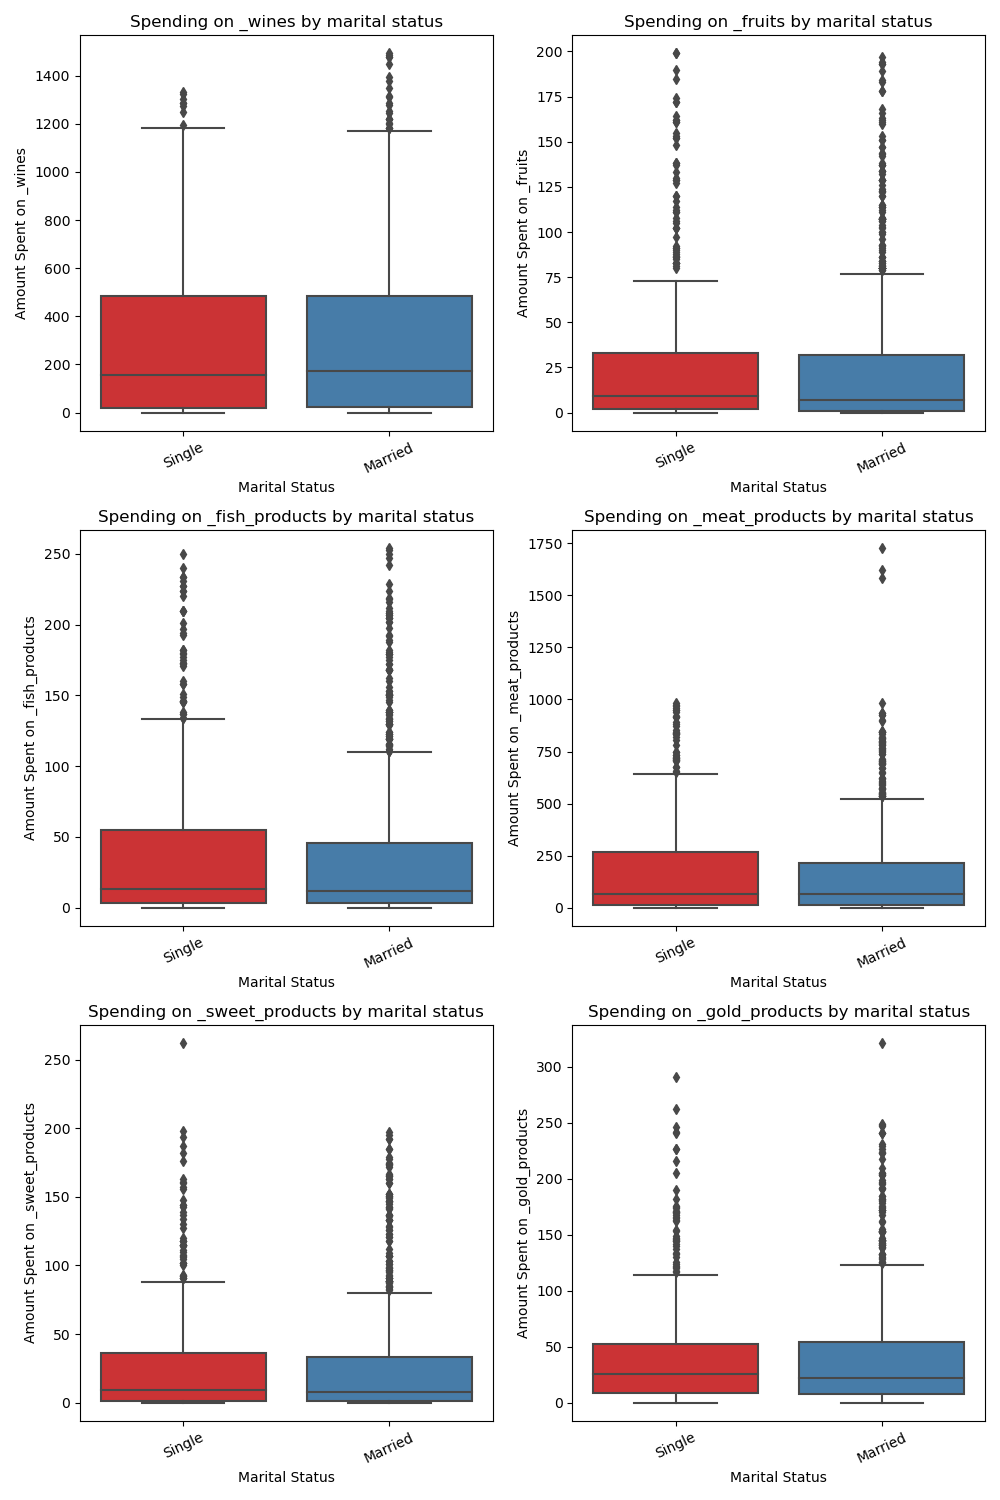

In [25]:
product_categories = ['mnt_wines', 'mnt_fruits', 'mnt_fish_products', 'mnt_meat_products',
                      'mnt_sweet_products', 'mnt_gold_products']

# Filter the DataFrame to include only rows with "Single" and "Married" marital status
filtered_data = marketing_data[marketing_data['marital_status'].isin(['Single', 'Married'])]

# Create a box plot for each product category using a for loop
plt.figure(figsize=(10, 15))
for i, category in enumerate(product_categories, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=filtered_data, x='marital_status', y=category, palette='Set1')
    plt.title(f"Spending on {category[3:]} by marital status")
    plt.xlabel("Marital Status")
    plt.ylabel(f"Amount Spent on {category[3:]}")
    plt.xticks(rotation=25)
    plt.tight_layout()

plt.show()

Based on the five conducted boxplots, we can say that the median spending of married customers is higher on wine but almost the same with single customer in other five categories.

#### More Customer Marital Status

In [26]:
# To conduct a statistical test on spending behavavior of single and married customers, we can use t-test.
from scipy.stats import ttest_ind

# Columns for which we want to perform the t-test
columns_to_compare = ['mnt_wines', 'mnt_fruits', 'mnt_meat_products', 'mnt_fish_products',
                      'mnt_sweet_products', 'mnt_gold_products']

# Separate the data for single and married customers
single_data = filtered_data[filtered_data['marital_status'] == 'Single']
married_data = filtered_data[filtered_data['marital_status'] == 'Married']

# Perform the independent two-sample t-test for each column
alpha = 0.05
for column in columns_to_compare:
    single_spending = single_data[column]
    married_spending = married_data[column]
    
    t_statistic, p_value = ttest_ind(single_spending, married_spending)
    
    print(f"Column: {column}")
    print(f"t-statistic: {t_statistic}")
    print(f"p-value: {p_value}")
    
    if p_value < alpha:
        print("The difference in spending behavior between single and married customers is statistically significant.")
    else:
        print("There is no statistically significant difference in spending behavior between single and married customers.")
    
    print("="*50)

Column: mnt_wines
t-statistic: -0.4411219045704799
p-value: 0.6591966600418018
There is no statistically significant difference in spending behavior between single and married customers.
Column: mnt_fruits
t-statistic: 0.707556928511898
p-value: 0.4793447848675859
There is no statistically significant difference in spending behavior between single and married customers.
Column: mnt_meat_products
t-statistic: 1.7918951884057988
p-value: 0.07337769309311898
There is no statistically significant difference in spending behavior between single and married customers.
Column: mnt_fish_products
t-statistic: 1.0798632389016245
p-value: 0.2803994587597413
There is no statistically significant difference in spending behavior between single and married customers.
Column: mnt_sweet_products
t-statistic: 0.13614580631029918
p-value: 0.8917266821473193
There is no statistically significant difference in spending behavior between single and married customers.
Column: mnt_gold_products
t-statistic: 0.1

#### Customer Complaints

In [27]:
# Finding the total sum of complain column
marketing_data['complain'].sum()


21

<IPython.core.display.Javascript object>


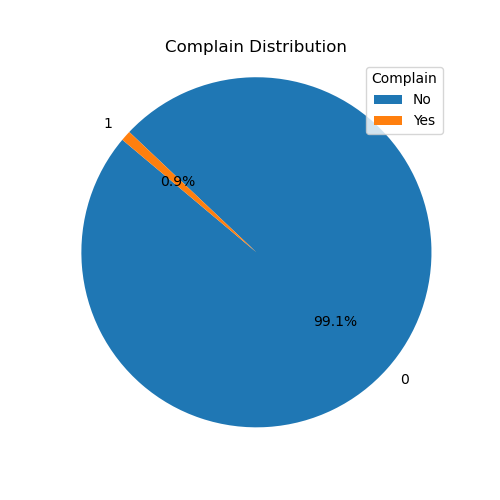

In [28]:
# Count the occurrences of each value in the 'Complain' column
complain_counts = marketing_data['complain'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(complain_counts, labels=complain_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Complain Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.legend(title='Complain', labels=['No', 'Yes'], loc='upper right')
plt.show()

The pie chart shows only 0.9% percent of customer complaints. We can fairly say that there is a very small percent that the customers give dissatifaction.

### Conclusion

#### Findings Overview

It has shown that the existing marketing campaigns are effective in influencing customer behaviors done over wine products.
Additionally, countries like SP, CA, US, IND, and SA have higher income levels and also have outliers far right that may represent customers with very high level of income. These high-income customers might be of particular interest for marketing strategies that target premium or high-end products.
Being single or married status has a low influence on affecting customer behaviors.
Lastly, there is a very low percent customer dissatisfaction.

#### Next Steps

This dataset also has plenty of information has still not been touched upon yet. Some things to consider in a future analysis are:

* Expounding the analysis on accepted campaigns; use them on other products such as fish, gold, and meat.
* Purchasing behavior by income
* Purchasing behavior by education and income
* Purchasing behavior by age